# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler


warnings.filterwarnings("ignore")

In [3]:
rawData = pd.DataFrame(pd.read_csv('./Car details v3.csv'))

In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
rawData.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


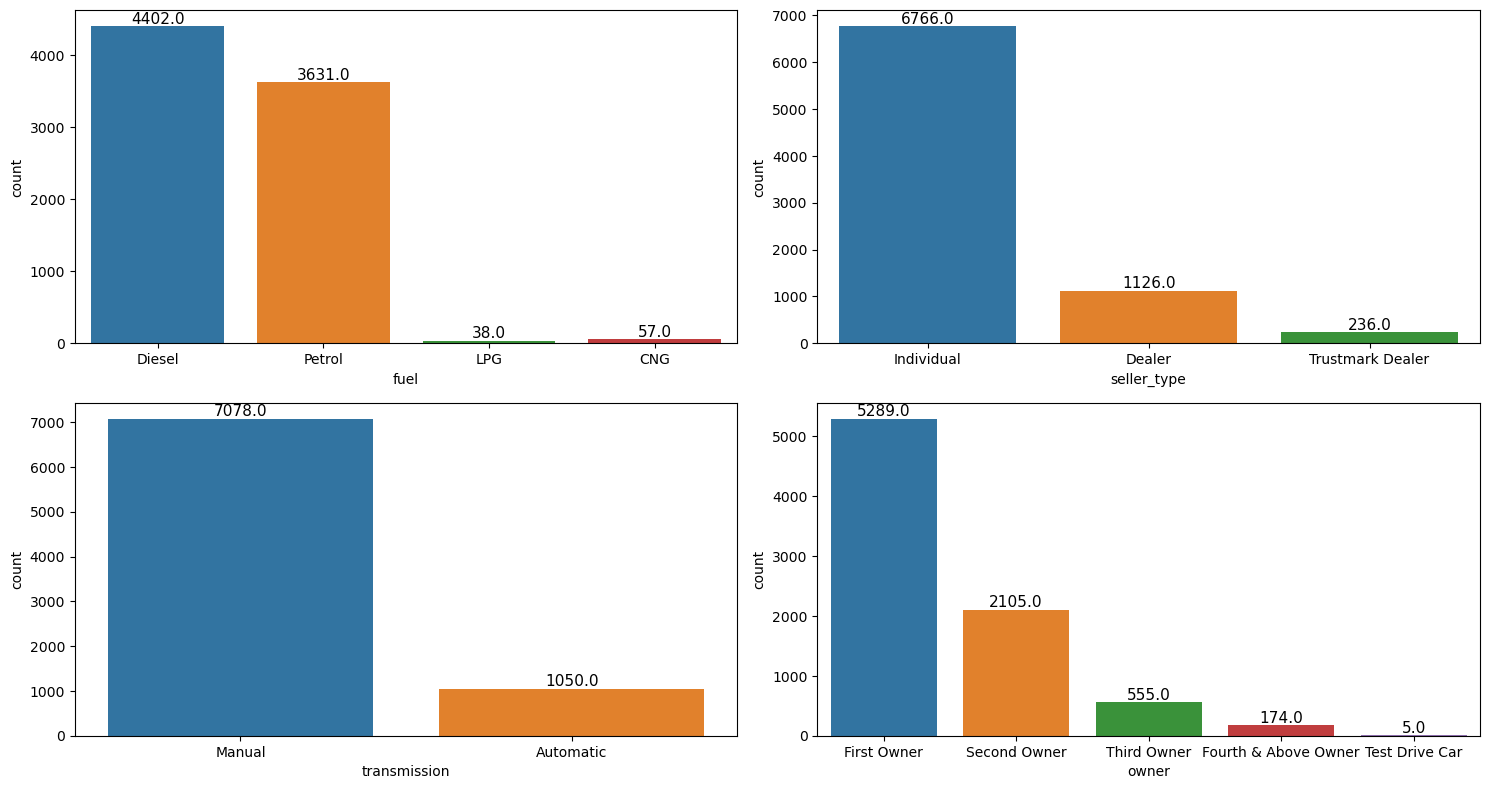

In [6]:
fig, axs = plt.subplots(2,2, figsize=(15,8))

sns.countplot(data=rawData, x="fuel", ax=axs[0,0])
sns.countplot(data=rawData, x="seller_type", ax=axs[0,1])
sns.countplot(data=rawData, x="transmission", ax=axs[1,0])
sns.countplot(data=rawData, x="owner", ax=axs[1,1])

# Agregar etiquetas de conteo a cada barra en cada subgráfico
for ax in axs.flatten():
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()



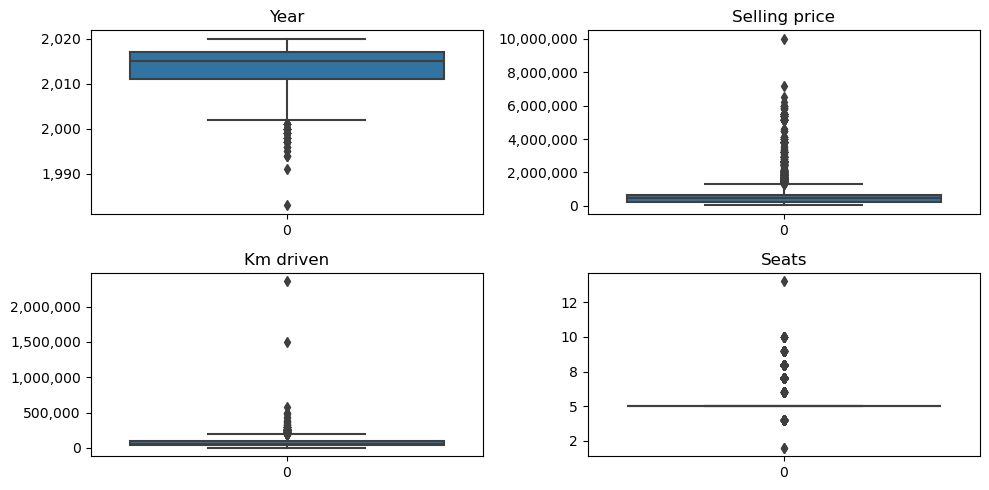

In [7]:
import matplotlib.ticker as ticker

fig, axs = plt.subplots(2, 2, figsize=(10, 5))

sns.boxplot(rawData['year'], ax=axs[0, 0]).set_title("Year")
sns.boxplot(rawData['selling_price'], ax=axs[0, 1]).set_title("Selling price")
sns.boxplot(rawData['km_driven'], ax=axs[1, 0]).set_title("Km driven")
sns.boxplot(rawData['seats'], ax=axs[1, 1]).set_title("Seats")

# Formatear el eje y de los gráficos
for ax in axs.flatten():
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


plt.tight_layout()
plt.show()

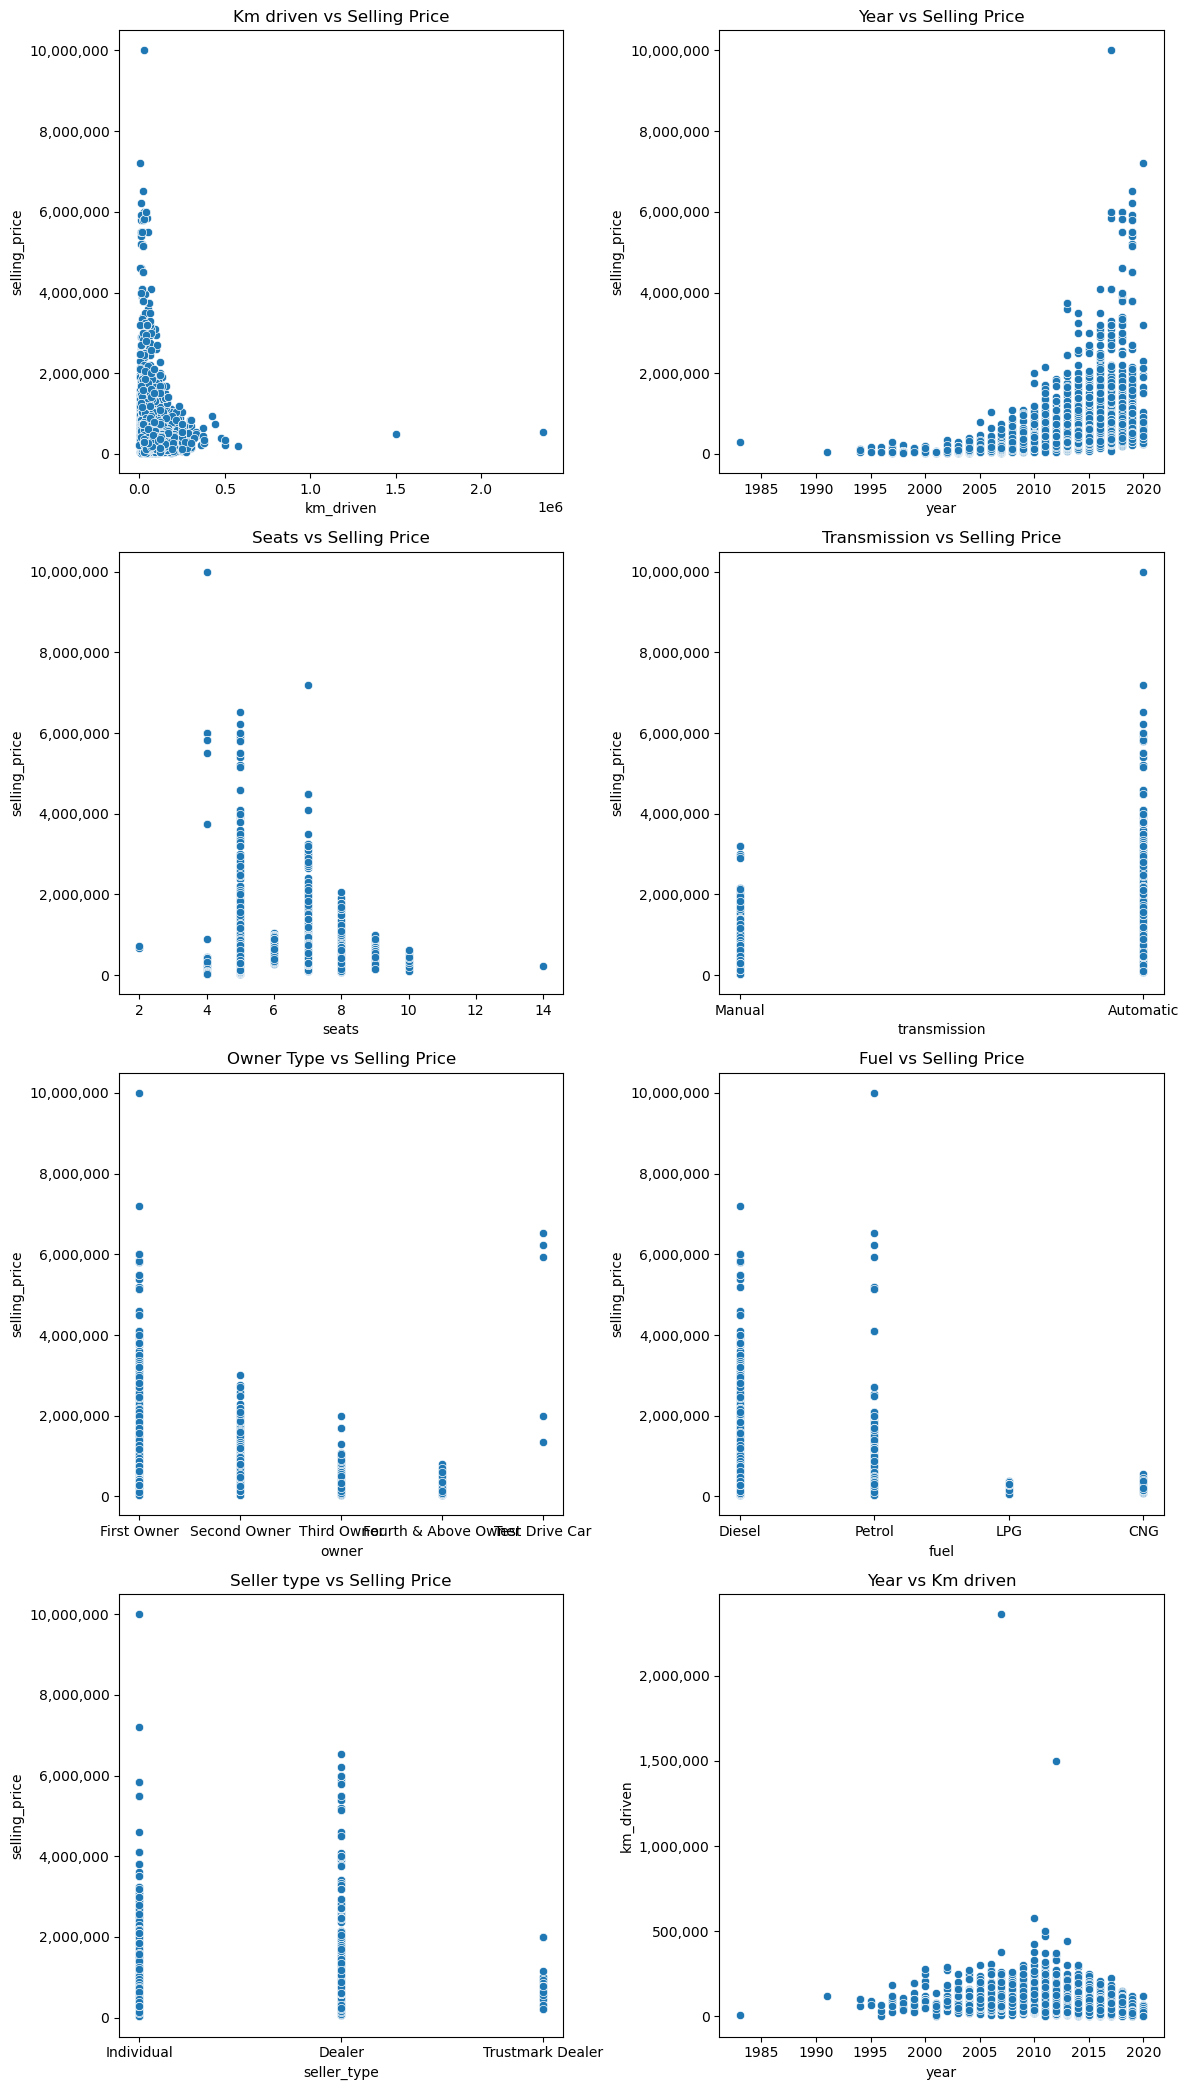

In [8]:
fig, axs = plt.subplots(4, 2, figsize=(12, 21))

sns.scatterplot(x="km_driven", y="selling_price", data=rawData, ax=axs[0, 0])
axs[0, 0].set_title("Km driven vs Selling Price")

sns.scatterplot(x="year", y="selling_price", data=rawData, ax=axs[0, 1])
axs[0, 1].set_title("Year vs Selling Price")

sns.scatterplot(x="seats", y="selling_price", data=rawData, ax=axs[1, 0])
axs[1, 0].set_title("Seats vs Selling Price")

sns.scatterplot(x="transmission", y="selling_price", data=rawData, ax=axs[1, 1])
axs[1, 1].set_title("Transmission vs Selling Price")

sns.scatterplot(x="owner", y="selling_price", data=rawData, ax=axs[2, 0])
axs[2, 0].set_title("Owner Type vs Selling Price")

sns.scatterplot(x="fuel", y="selling_price", data=rawData, ax=axs[2, 1])
axs[2, 1].set_title("Fuel vs Selling Price")

sns.scatterplot(x="seller_type", y="selling_price", data=rawData, ax=axs[3, 0])
axs[3, 0].set_title("Seller type vs Selling Price")

sns.scatterplot(x="year", y="km_driven", data=rawData, ax=axs[3, 1])
axs[3, 1].set_title("Year vs Km driven")

# Formatear el eje y de los gráficos
for ax in axs.flatten():
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.tight_layout()
plt.show()

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [9]:
rawData.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [10]:
car_data = rawData.dropna(subset=["mileage", "engine", "max_power", "torque", "seats"])

In [11]:
car_data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [12]:
countKmpl = 0
countNm = 0
countCc = 0
countBhp = 0
for mileage in car_data['mileage']:
    if isinstance(mileage, str) and 'kmpl' not in mileage.lower():
        countKmpl += 1

for torque in car_data['torque']:
    if isinstance(torque, str) and 'nm' not in torque.lower():
        countNm += 1

for engine in car_data['engine']:
    if isinstance(engine, str) and 'cc' not in engine.lower():
        countCc += 1

for power in car_data['max_power']:
    if isinstance(power, str) and 'bhp' not in power.lower():
        countBhp += 1
        
print('El número de filas en mileage con unidades diferentes a kmpl son: {}'.format(countKmpl))
print('El número de filas en torque con unidades diferentes a nm son: {}'.format(countNm))
print('El número de filas en engine con unidades diferentes a cc son: {}'.format(countCc))
print('El número de filas en max_power con unidades diferentes a bhp son: {}'.format(countBhp))

El número de filas en mileage con unidades diferentes a kmpl son: 87
El número de filas en torque con unidades diferentes a nm son: 516
El número de filas en engine con unidades diferentes a cc son: 0
El número de filas en max_power con unidades diferentes a bhp son: 0


In [13]:
unidades_diferentes = set()
for valor in car_data['mileage']:
    if type(valor) is str and "kmpl" not in valor.lower():
        unidades_diferentes.add("km/kg") if "km/kg" in valor.lower() else unidades_diferentes.add(valor)

if unidades_diferentes:
    print("Unidades diferentes a kmpl:", unidades_diferentes)


Unidades diferentes a kmpl: {'km/kg'}


In [14]:
unidades_diferentes = set()
for valor in car_data['torque']:
    if isinstance(valor, str) and "nm" not in valor.lower():
        unidades_diferentes.add("kgm") if "kgm" in valor.lower() else unidades_diferentes.add(valor)

if unidades_diferentes:
    print("Unidades diferentes a nm:", unidades_diferentes)


Unidades diferentes a nm: {'kgm', '510@ 1600-2400', '110(11.2)@ 4800', '250@ 1250-5000rpm', '210 / 1900'}


In [15]:

car_data['mileage'] = car_data['mileage'].apply(lambda x: round(float(re.findall(r'(\d+\.*\d*)', x)[0]) * 1.4, 2) if "km/kg" in x else round(float(re.findall(r'(\d+\.*\d*)', x)[0]), 2))

car_data[['torque', 'rpm']] = car_data['torque'].str.split('/|@|at', n=1, expand=True)
car_data = car_data.drop('rpm', axis=1)
car_data['torque'] = car_data['torque'].str.extract(r'(\d+\.*\d*)').astype(float)
car_data['torque'] = car_data['torque'].apply(lambda x: round(9.81*x,2) if x <= 50 else round(x,2))

In [16]:
car_data['engine'] = car_data['engine'].str.extract(r'(\d+\.*\d*)').astype(float)
car_data['max_power'] = car_data['max_power'].str.extract(r'(\d+\.*\d*)').astype(float)

In [17]:
car_data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.00,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,124.59,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.74,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.82,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,24.22,1061.0,57.50,76.52,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,59.00,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,170.00,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,160.00,5.0


In [18]:
print(car_data["fuel"].unique())
print(car_data['seller_type'].unique())
print(car_data['transmission'].unique())
print(car_data['owner'].unique())

car_data['owner'].value_counts()

['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


owner
First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: count, dtype: int64

In [19]:
# Codificación binaria para 'fuel', 'seller_type', 'transmission'
car_data = pd.get_dummies(car_data, columns=['fuel','seller_type','transmission'], dtype = 'int64')

owner_mapping = {
    "Test Drive Car": 0,
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4
}

# Codificación ordinal a la columna 'owner'
car_data['owner_ordinal'] = car_data['owner'].map(owner_mapping)
car_data.drop('owner', axis=1, inplace=True)

print(car_data.columns)


Index(['name', 'year', 'selling_price', 'km_driven', 'mileage', 'engine',
       'max_power', 'torque', 'seats', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_ordinal'],
      dtype='object')


In [20]:
car_data.drop('name', axis=1, inplace=True)

In [21]:
car_data.head(10)

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_ordinal
0,2014,450000,145500,23.40,1248.0,74.00,190.00,5.0,0,1,0,0,0,1,0,0,1,1
1,2014,370000,120000,21.14,1498.0,103.52,250.00,5.0,0,1,0,0,0,1,0,0,1,2
2,2006,158000,140000,17.70,1497.0,78.00,124.59,5.0,0,0,0,1,0,1,0,0,1,3
3,2010,225000,127000,23.00,1396.0,90.00,219.74,5.0,0,1,0,0,0,1,0,0,1,1
4,2007,130000,120000,16.10,1298.0,88.20,112.82,5.0,0,0,0,1,0,1,0,0,1,1
5,2017,440000,45000,20.14,1197.0,81.86,113.75,5.0,0,0,0,1,0,1,0,0,1,1
6,2007,96000,175000,24.22,1061.0,57.50,76.52,5.0,0,0,1,0,0,1,0,0,1,1
7,2001,45000,5000,16.10,796.0,37.00,59.00,4.0,0,0,0,1,0,1,0,0,1,2
8,2011,350000,90000,23.59,1364.0,67.10,170.00,5.0,0,1,0,0,0,1,0,0,1,1
9,2013,200000,169000,20.00,1399.0,68.10,160.00,5.0,0,1,0,0,0,1,0,0,1,1


# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

- La variable objetivo es **selling_price**

- Para este caso practico y de aprendizaje, consideramos interesante ver la capacidad que cada una de las caracteristicas puede tener sobre el precio del automovil.

# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [39]:
y = car_data['selling_price']
x = car_data.drop('selling_price', axis=1)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=300)

# 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [40]:
Lr = LinearRegression()
Lr.fit(xTrain, yTrain)

LinearRegression()

# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [41]:
yPred = Lr.predict(xTest)
r2 = r2_score(yTest, yPred)
mse = mean_squared_error(yTest, yPred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)

R2 Score: 0.6801733248511816
Mean Squared Error: 198251162558.21295


# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

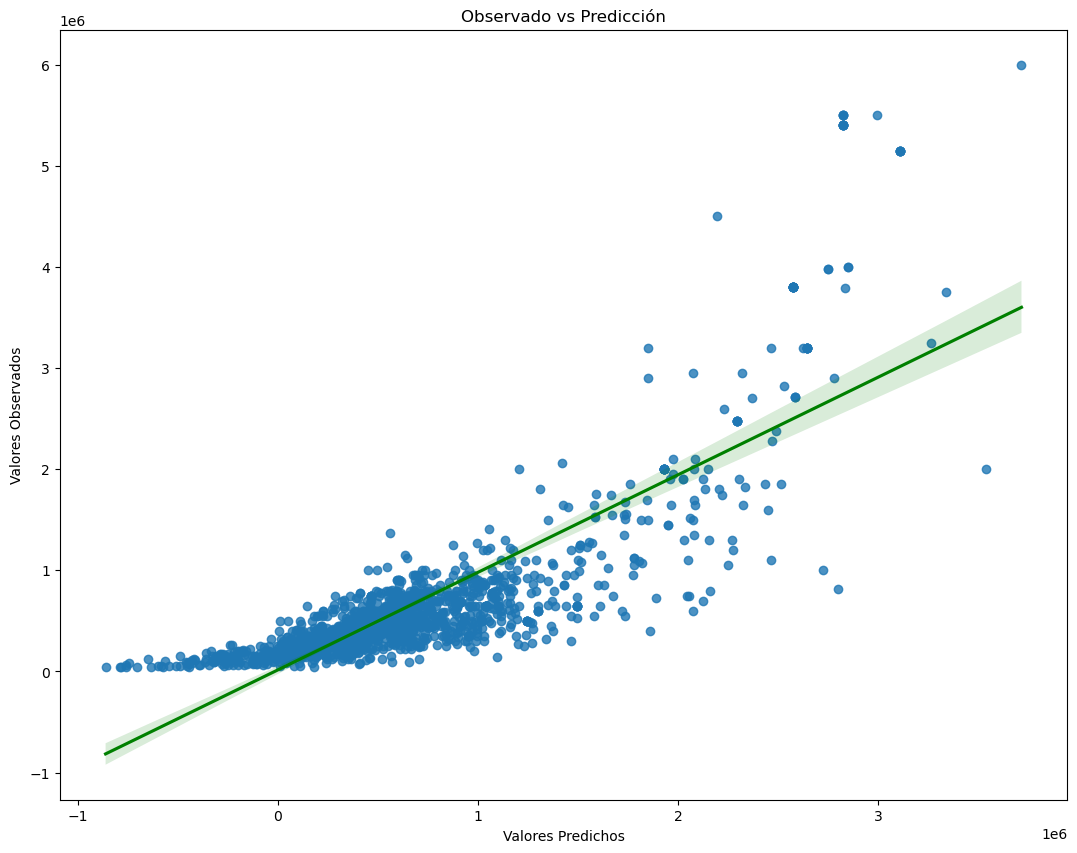

In [42]:
fig = plt.figure(figsize=[13, 10])
ax = sns.regplot(x=yPred, y=yTest, line_kws={'color': 'green'})
ax.set(xlabel='Valores Predichos', ylabel='Valores Observados', title='Observado vs Predicción')
plt.show()

In [43]:
pd.DataFrame({'Observado': yTest, 'Predicción': yPred}).corr()

,Observado,Predicción
Observado,1.000000,0.825334
Predicción,0.825334,1.000000


# 8. Interpretar, analizar y documentar los resultados obtenidos.

- **R2 Score**: Un valor de 0.68, indica que aproximadamente el 68% de la variabilidad en los precios de venta de los automóviles puede explicarse por las características utilizadas en el modelo. 

- **Mean Squared Error**: El valor del MSE, que es de aproximadamente 198,251,162,558.21, representa el promedio de los cuadrados de los errores entre las predicciones del modelo y los valores reales. En este caso, el valor es bastante alto, lo que indica que las predicciones del modelo pueden alejarse considerablemente de los valores reales.

- **Gráfico de dispersión de Observado vs Predicción**: En este gráfico, los puntos representan las predicciones del modelo (eje x) y los valores reales (eje y). En el gráfico, parece haber cierta dispersión, lo que sugiere que el modelo no predice con precisión los precios de venta en todos los casos.

- **Matriz de correlación entre observado y predicción**: La matriz de correlación muestra cómo se correlacionan las variables 'Observado' (valores reales) y 'Predicción' (valores predichos). Un valor de correlación cercano a 1 indica una fuerte correlación positiva entre las dos variables, lo que sugiere que las predicciones del modelo están en línea con los valores reales. 
